In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv("pcos_dataset.csv")
data.head()

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
0,24,34.7,1,25.2,20,0
1,37,26.4,0,57.1,25,0
2,32,23.6,0,92.7,28,0
3,28,28.8,0,63.1,26,0
4,25,22.1,1,59.8,8,0


In [ ]:
data.isnull().sum()

,0
Age,0
BMI,0
Menstrual_Irregularity,0
Testosterone_Level(ng/dL),0
Antral_Follicle_Count,0
PCOS_Diagnosis,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1000 non-null   int64  
 1   BMI                        1000 non-null   float64
 2   Menstrual_Irregularity     1000 non-null   int64  
 3   Testosterone_Level(ng/dL)  1000 non-null   float64
 4   Antral_Follicle_Count      1000 non-null   int64  
 5   PCOS_Diagnosis             1000 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 47.0 KB


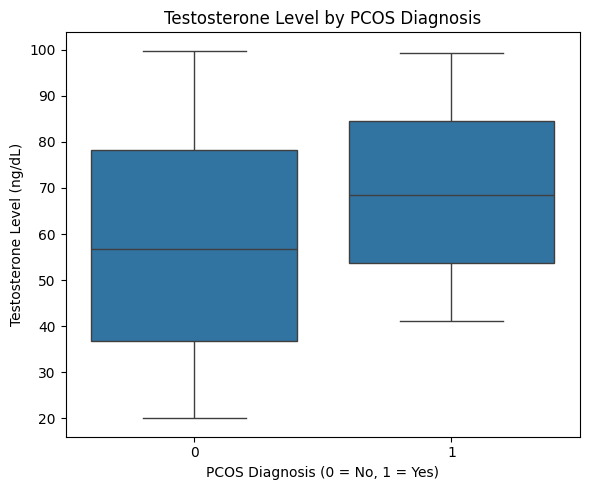

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot of Testosterone Level by PCOS Diagnosis
plt.figure(figsize=(6, 5))
sns.boxplot(x='PCOS_Diagnosis', y='Testosterone_Level(ng/dL)', data=data)
plt.title('Testosterone Level by PCOS Diagnosis')
plt.xlabel('PCOS Diagnosis (0 = No, 1 = Yes)')
plt.ylabel('Testosterone Level (ng/dL)')
plt.tight_layout()
plt.show()

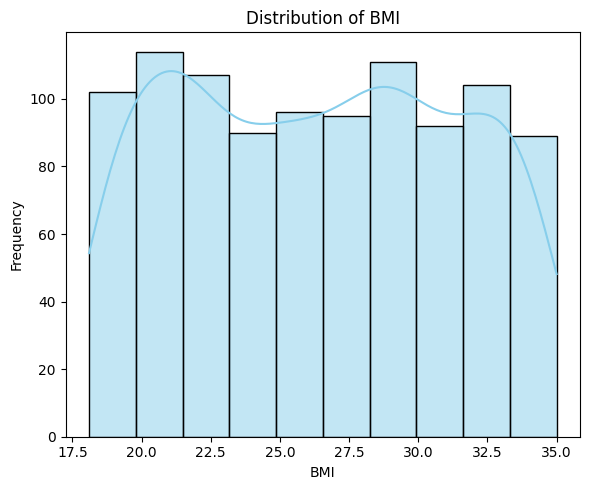

In [ ]:
# Distribution Plot of BMI
plt.figure(figsize=(6, 5))
sns.histplot(data['BMI'], kde=True, bins=10, color='skyblue')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

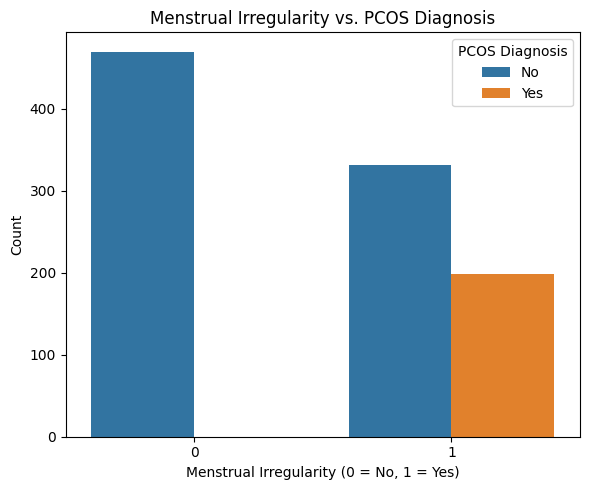

In [ ]:
# Count Plot of Menstrual Irregularity by Diagnosis
plt.figure(figsize=(6, 5))
sns.countplot(x='Menstrual_Irregularity', hue='PCOS_Diagnosis', data=data)
plt.title('Menstrual Irregularity vs. PCOS Diagnosis')
plt.xlabel('Menstrual Irregularity (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='PCOS Diagnosis', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

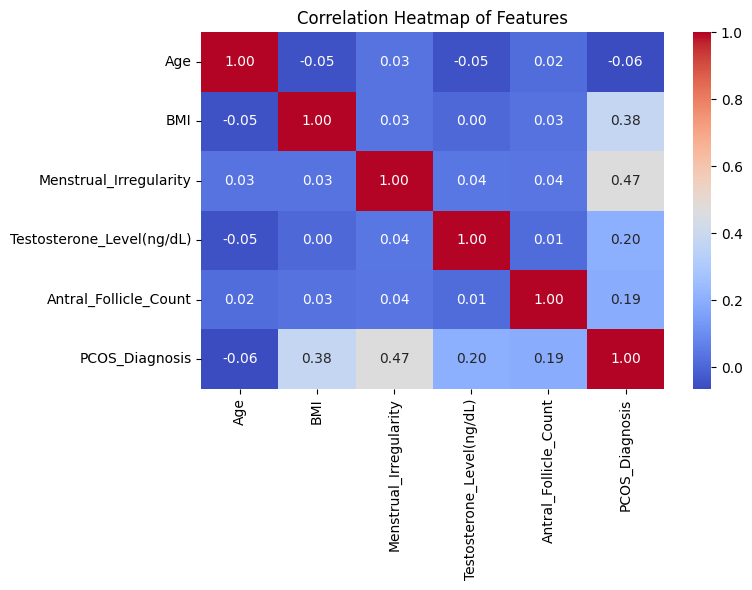

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.tight_layout()
plt.show()

Accuracy: 0.975
Precision: 0.9722222222222222
Recall: 0.8974358974358975
F1 Score: 0.9333333333333333
Classification Report:

              precision    recall  f1-score   support

     No PCOS       0.98      0.99      0.98       161
        PCOS       0.97      0.90      0.93        39

    accuracy                           0.97       200
   macro avg       0.97      0.95      0.96       200
weighted avg       0.97      0.97      0.97       200



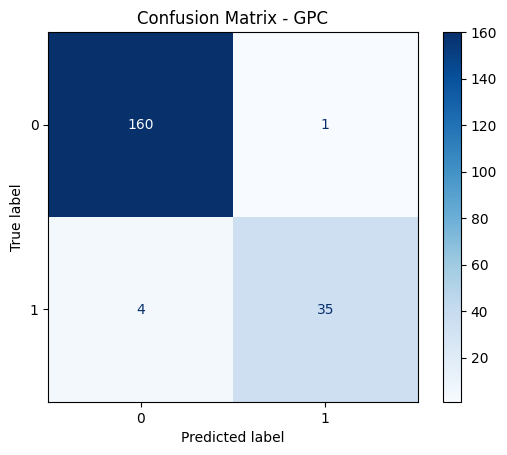

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

X = data.drop(columns='PCOS_Diagnosis')
y = data['PCOS_Diagnosis']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 5: Gaussian Process Classifier
kernel = 1.0 * RBF(length_scale=1.0)
gpc = GaussianProcessClassifier(kernel=kernel, random_state=42)
gpc.fit(X_train, y_train)

# Step 6: Prediction and Evaluation
y_pred = gpc.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, zero_division=0))
print("Recall:", recall_score(y_test, y_pred, zero_division=0))
print("F1 Score:", f1_score(y_test, y_pred, zero_division=0))

# Generate and print the classification report
report = classification_report(y_test, y_pred, target_names=['No PCOS', 'PCOS'], zero_division=0)
print("Classification Report:\n")
print(report)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gpc.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - GPC")
plt.show()